**Purpose for study only**

# Data understanding

**Fake and real news dataset**

title : The title of the article

text : The text of the article

subject : The subject of the article

date : The date at which the article was posted

Dataset : https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
# from sklearn.model import train_test_split

# Download Fake Data from csv file and define status is 0.
fake_1='/content/drive/My Drive/project/Fake_news/Fake.csv'
dfraw = pd.read_csv(fake_1)
dfraw= pd.DataFrame(dfraw)
dfraw= dfraw.iloc[0:5000,:]
dfraw['status']= 0

# Download True Data from csv file  and define status is 1.
True_1='/content/drive/My Drive/project/Fake_news/True.csv'
dfraw1 = pd.read_csv(True_1)
dfraw1= pd.DataFrame(dfraw1)
dfraw1= dfraw1.iloc[0:5000,:]
dfraw1['status']= 1
 
# Concatnate  Fake and True data
df=pd.concat([dfraw, dfraw1], axis=0)
# # print(df.head())
# # print(df.info())
print(df.columns)
print(df.shape)

#Create new dataframe
title_data= df.loc[:,['date','status']]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Index(['title', 'text', 'subject', 'date', 'status'], dtype='object')
(10000, 5)


# Data Preparation

Cleaning data in column  'title', 'text' and  'subject'


*   All character to be lower
*   Remove  \[.*?\] 

*   Remove punctuation
*   Remove words containing numbers


In [18]:
import re
import string
cols=['title', 'text', 'subject']

for col in cols:
    
    def clean_text_round1(text):
        ##'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\w*\d\w*', '', text)
        return text

    round1 = lambda x: clean_text_round1(x)

    title_data[col] = pd.DataFrame(df[col].apply(round1))
    # print(title_data_clean.head())

    # Apply a second round of cleaning
    def clean_text_round2(text):
        '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
        text = re.sub('[‘’“”…]', '', text)
        text = re.sub('\n', '', text)
        return text
    round2 = lambda x: clean_text_round2(x)
    title_data[col] = pd.DataFrame(title_data[col].apply(round2))
  
#Save data into pickle and csv
title_data.to_pickle('data_clean.pkl')
title_data.to_csv('data_clean.csv')
print(title_data.head())
data=title_data
# print(data)

                date  ...  subject
0  December 31, 2017  ...     news
1  December 31, 2017  ...     news
2  December 30, 2017  ...     news
3  December 29, 2017  ...     news
4  December 25, 2017  ...     news

[5 rows x 5 columns]


Tokenizing  uses nltk  


*   Remove word as the,is ,and etc using stopwords
*   Remove ending that are -ing ,-s ,-able and -ly of words 

*   Create  dictionary of word list

In [19]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from itertools import chain
from nltk.stem import RegexpStemmer
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_text_list(ls):
    
    print("working on")
    stop_words = set(stopwords.words('english'))
    st = RegexpStemmer('ing$|s$|able$|ly$', min=4)
    word_tokens  = list(chain.from_iterable([word_tokenize(ls)]))
    # word_tokens = re.sub('\xed', '', word_tokens)
    # print(word_tokens )
    # filtered_sentence = [ps.stem(w) for w in word_tokens ] 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    # print(filtered_sentence) 
    filtered_sentence = [st.stem(w) for w in filtered_sentence ] 
    # print(filtered_sentence) 
    # print(filtered_sentence) 
    return filtered_sentence

data.tokenized_texts = data.title.map(tokenize_text_list)
data['tokenized_texts'] = data.title.map(tokenize_text_list)
# print(tokenized_texts)
p=set(chain.from_iterable(data.tokenized_texts))
print(p)

#crate dictionay of wording
vocabulary_ = {v: k for k, v in enumerate(set(chain.from_iterable(data.tokenized_texts)))  }
# print(vocabulary_)

#save vocabulary in pickle
with open('vocabulary.pkl', 'wb') as handle:
    pickle.dump(vocabulary_, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('Fake_new\\vocabulary.pkl', 'rb') as handle:
#     x = pickle.load(handle)
print(len(vocabulary_))
f=pd.DataFrame(list( vocabulary_ .items()),columns=['word','ind'])
f.sort_values('ind', ascending=True).reset_index(inplace=True)
f.to_csv("index_test.csv")
# f.to_pickle("Fake_new\index_test.pkl")


#apply index of word on title
def  word_index(word):
    return[vocabulary_[v] for v in word]

data['word_index_line']=data.tokenized_texts.map(word_index)
data.word_index_line=data.tokenized_texts.map(word_index)
print(data.columns)
data.to_csv("index_coulmn_test.csv")
data.to_pickle("index_coulmn_test.pkl")

Streaming output truncated to the last 5000 lines.
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
wor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


Streaming output truncated to the last 5000 lines.
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
working on
wor

Vectorize_sequence

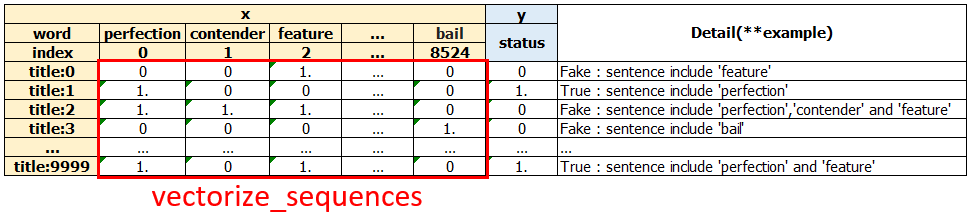

In [20]:
#Download data already tokenize and specify index
data = pd.read_pickle('/content/drive/My Drive/project/Fake_news/index_coulmn_test_10000.pkl')
fake = data.iloc[:5000,:]
# print(fake['status'].tail())
true = data.iloc[5000:,:]
# print(true['status'].head())
# print(data.head())

with open('/content/drive/My Drive/project/Fake_news/vocabulary_10000.pkl', 'rb') as handle:
    vocabulary_ = pickle.load(handle)
# print(vocabulary_)
# print(len(vocabulary_))

In [21]:
from itertools import chain
#fuction change index into word
def get_key(val): 
  # print(val)
  p=[]
  for word in val:
    for key, value in vocabulary_.items(): 
         if word == value: 
            p.append(str(key))
  # print(p)
  return p 

rou = lambda x: get_key(x)
fake['word_column'] = pd.DataFrame(fake['word_index_line'].apply(rou))
true['word_column'] = pd.DataFrame(true['word_index_line'].apply(rou))
# print(data)

#combine  word of each line
fake_p=set(chain.from_iterable(fake.word_column))
true_p=set(chain.from_iterable(true.word_column))
# print(p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


**WordCloud of Fake news**

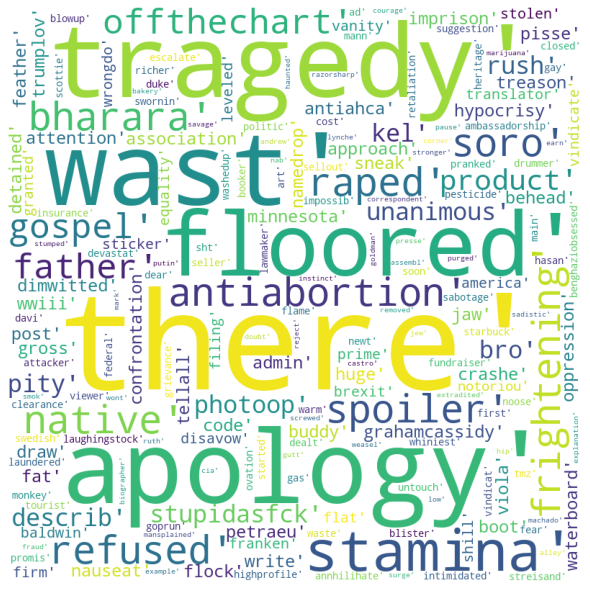

In [22]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import nltk
# stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                # stopwords = stopwords, 
                min_font_size = 10).generate(str(fake_p))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**WordCloud of real news**

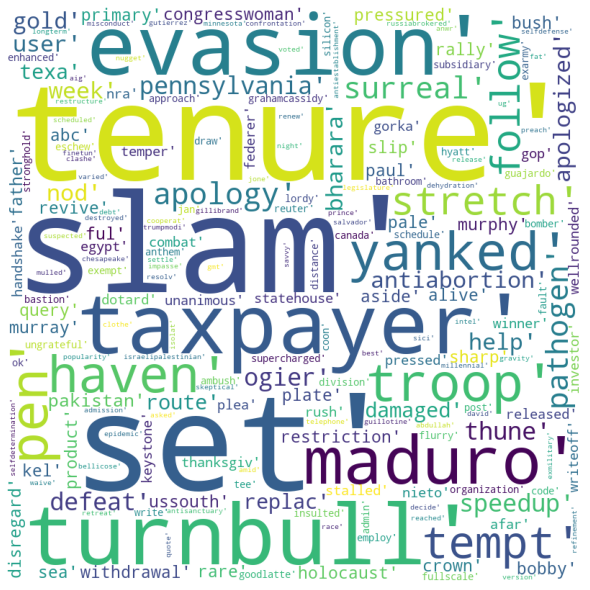

In [23]:
# stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                # stopwords = stopwords,
                min_font_size = 10).generate(str(true_p))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.show()

In [24]:
data = pd.read_pickle('/content/drive/My Drive/project/Fake_news/index_coulmn_test_10000.pkl')
print(data.columns)


Index(['date', 'status', 'title', 'text', 'subject', 'word_index_line'], dtype='object')


In [25]:
from sklearn.model_selection import train_test_split

#Download data already tokenize and specify index
data = pd.read_pickle('/content/drive/My Drive/project/Fake_news/index_coulmn_test_10000.pkl')
print(data.head())

with open('/content/drive/My Drive/project/Fake_news/vocabulary_10000.pkl', 'rb') as handle:
    vocabulary_ = pickle.load(handle)
print(len(vocabulary_))


def vectorize_sequences(sequences, dimension=len(vocabulary_)):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    # print(results)
    # print(results.shape)
    for i, sequence in enumerate(sequences):
        # print(sequence)
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
        # print(results)
        # print(results.shape)
    return results

# vectorized title data
x= vectorize_sequences(data.word_index_line)
# X_data_vec.to_pickle("Fake_new\x_data.pkl")
# print(x_train)
print(x.shape)

# Setting status data to array
y = np.asarray(data.status).astype('float32')
print(y.shape)
print(y )

#Split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
p=pd.DataFrame(y_train)
p.to_csv('y_train.csv')
q=pd.DataFrame(y_test)
q.to_csv('y_test.csv')

#Split  train dataset to validation  dataset
x_val, partial_x_train, y_val, partial_y_train = train_test_split(x_train,y_train, test_size=0.6)
print(x_val.shape , y_val.shape)
print(partial_x_train.shape,partial_y_train.shape)
# x_val = x_train[:4800]
# partial_x_train = x_train[4800:]
# y_val = y_train[:4800]
# partial_y_train = y_train[4800:]

                date  ...                                    word_index_line
0  December 31, 2017  ...  [490, 3760, 3928, 4881, 4051, 2770, 913, 8381,...
1  December 31, 2017  ...     [3728, 149, 3760, 2480, 7241, 633, 7620, 4426]
2  December 30, 2017  ...  [6103, 7792, 245, 6744, 2067, 8094, 687, 5976,...
3  December 29, 2017  ...   [3760, 6362, 1569, 6287, 7830, 8379, 5054, 2517]
4  December 25, 2017  ...            [1497, 2453, 5077, 490, 3760, 951, 135]

[5 rows x 6 columns]
8525
(10000, 8525)
(10000,)
[0. 0. 0. ... 1. 1. 1.]
(8000, 8525) (2000, 8525)
(8000,) (2000,)
(3200, 8525) (3200,)
(4800, 8525) (4800,)


# Modeling

**Classification  model**

 input  data : vectorized text  size =( len of vocabulary ,)

 Hiddle layer : (16,16,1)

 Output data : Probability data

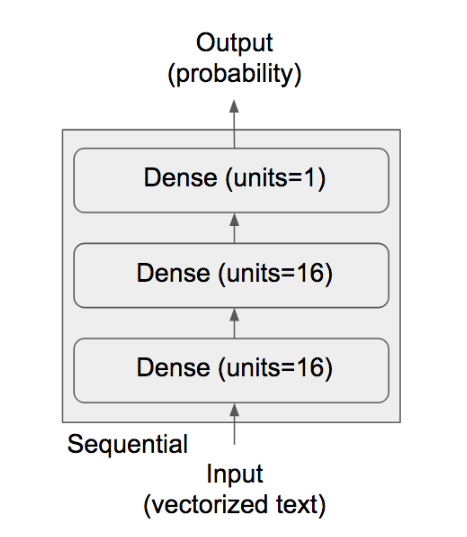

**Activation function**

1. Relu : output > 0

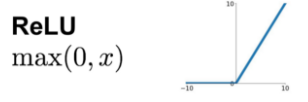

2. sigmoid : Probability output =[-1,1]

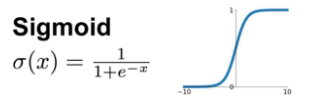

In [26]:
from keras import models
from keras import layers
from keras import optimizers

#Crate model from keras
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(vocabulary_),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                136416    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 136,705
Trainable params: 136,705
Non-trainable params: 0
_________________________________________________________________
None


Trainning model with 20 epochs and mini-batch is 128  with  validation_data

In [27]:
#compile model using binary_crossentropy  because { fake:0 , true:1}
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

history_dict = history.history
print(history_dict)
print(history_dict.keys())

Train on 4800 samples, validate on 3200 samples
Epoch 1/20
4800/4800 [==============================] - 1s 150us/step - loss: 0.6171 - accuracy: 0.8331 - val_loss: 0.5192 - val_accuracy: 0.9122
Epoch 2/20
4800/4800 [==============================] - 0s 73us/step - loss: 0.4197 - accuracy: 0.9365 - val_loss: 0.3539 - val_accuracy: 0.9278
Epoch 3/20
4800/4800 [==============================] - 0s 77us/step - loss: 0.2638 - accuracy: 0.9535 - val_loss: 0.2498 - val_accuracy: 0.9328
Epoch 4/20
4800/4800 [==============================] - 0s 77us/step - loss: 0.1675 - accuracy: 0.9625 - val_loss: 0.1961 - val_accuracy: 0.9359
Epoch 5/20
4800/4800 [==============================] - 0s 77us/step - loss: 0.1118 - accuracy: 0.9710 - val_loss: 0.1705 - val_accuracy: 0.9362
Epoch 6/20
4800/4800 [==============================] - 0s 78us/step - loss: 0.0791 - accuracy: 0.9783 - val_loss: 0.1641 - val_accuracy: 0.9375
Epoch 7/20
4800/4800 [==============================] - 0s 77us/step - loss: 0.05

# Evaluation

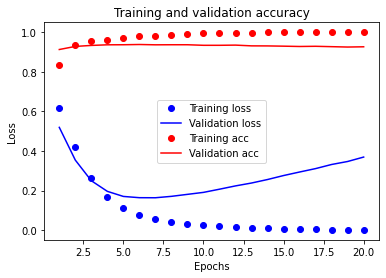

In [28]:
import matplotlib.pyplot as plt
#Plot accuracy  and loss of model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss & accuracy')
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


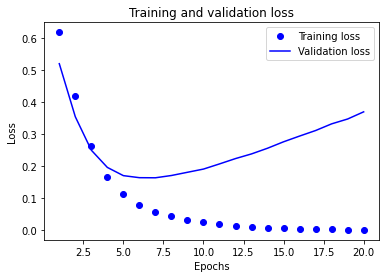

In [29]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

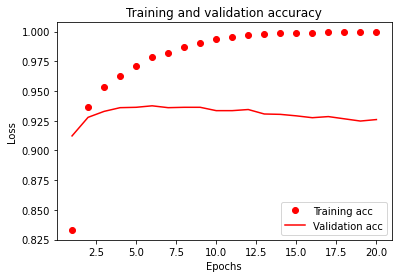

In [30]:
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
#Fit model uses 4 epochs to prevent overfit
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(vocabulary_),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=128)


Epoch 1/4
8000/8000 [==============================] - 1s 64us/step - loss: 0.5606 - accuracy: 0.8704
Epoch 2/4
8000/8000 [==============================] - 0s 60us/step - loss: 0.2856 - accuracy: 0.9451
Epoch 3/4
8000/8000 [==============================] - 0s 56us/step - loss: 0.1512 - accuracy: 0.9595
Epoch 4/4
8000/8000 [==============================] - 0s 58us/step - loss: 0.0973 - accuracy: 0.9714


# Deployment

In [32]:
# Accuracy show 95%
results = model.evaluate(x_test, y_test)
print(results)

#predict data
pred = model.predict(x_test)
pre=pd.DataFrame(pred)
pre.to_csv('y_predict.csv')
print(pred)

2000/2000 [==============================] - 0s 47us/step
[0.12392586266994476, 0.9514999985694885]
[[9.4682568e-01]
 [5.8150291e-04]
 [1.7981264e-01]
 ...
 [5.6027770e-02]
 [4.0721208e-01]
 [9.8037004e-01]]


Reference:

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/1-Data-Cleaning.ipynb

https://medium.com/mmp-li/deep-learning-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%89%E0%B8%9A%E0%B8%B1%E0%B8%9A%E0%B8%AA%E0%B8%B2%E0%B8%A1%E0%B8%B1%E0%B8%8D%E0%B8%8A%E0%B8%99-ep-2-optimization-activation-function-%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B8%AA%E0%B8%9A%E0%B8%B2%E0%B8%A2%E0%B9%86%E0%B8%AA%E0%B9%84%E0%B8%95%E0%B8%AA%E0%B9%8C%E0%B8%8A%E0%B8%B4%E0%B8%A5%E0%B9%86-9feb5a87e3b2


https://guopai.github.io/ml-blog17.html

http://dataminingtrend.com/2014/data-mining-techniques/crisp-dm-example/


